# 주차수요 예측 AI 경진대회

- 데이콘 페이지에서 진행하는 경진대회
- 연결 페이지: https://dacon.io/competitions/official/235745/overview/description
- 시간 절약을 위해, 다른 분이 공유해준 코드를 바탕으로 간단히 데이터의 형태를 알아본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import warnings

In [2]:
## data files

age_gender = pd.read_csv(".\\data\\age_gender_info.csv")
train = pd.read_csv(".\\data\\train.csv")
test = pd.read_csv(".\\data\\test.csv")

## Train, Test 데이터

In [3]:
## 데이터 모양
train.shape, test.shape, age_gender.shape,

((2952, 15), (1022, 14), (16, 23))

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [5]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
도보 10분거리 내 버스정류장 수,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0


In [6]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


## Age/Gender 데이터

In [7]:
ag = age_gender.set_index('지역')
ag.head()

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
지역,,,,,,,,,,,,,,,,,,,,,
경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [8]:
ag.loc['전체평균'] = ag.mean()
ag.loc['광역시 평균']  = ag.loc[(ag.index.str.contains('시')) & (~ag.index.str.contains('세종'))].mean()
ag.loc['도 평균'] = ag.loc[ag.index.str.contains('도')].mean()

<AxesSubplot:>

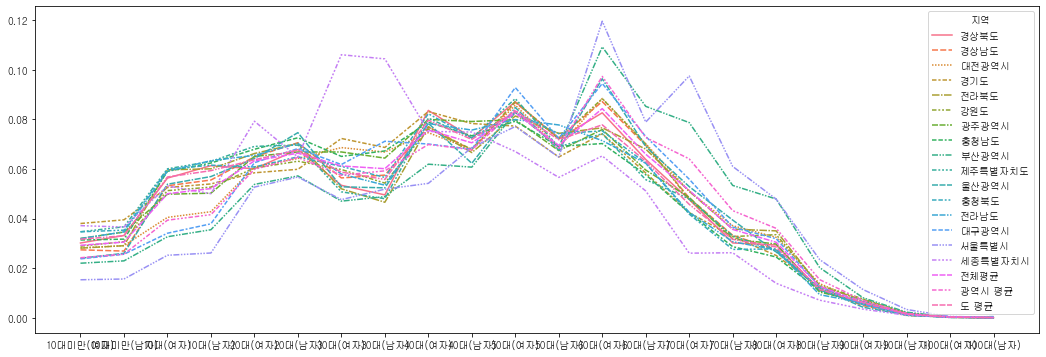

In [9]:
fig = plt.figure(figsize = (18, 6))
seaborn.lineplot(data=ag.T,)

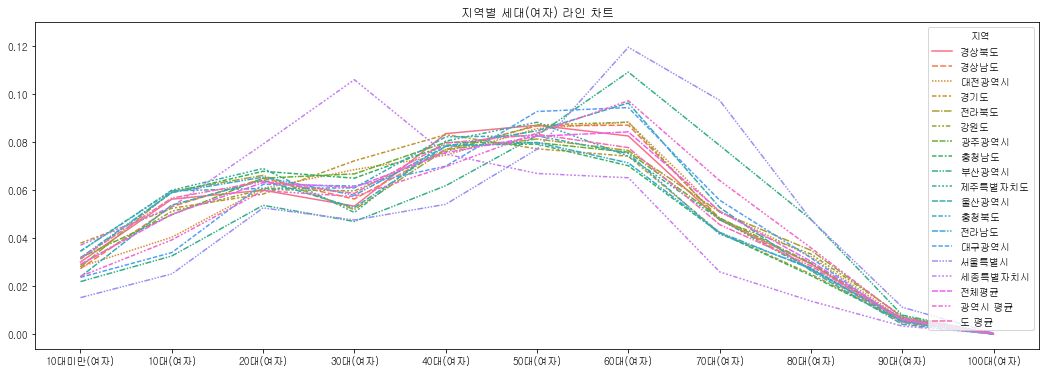

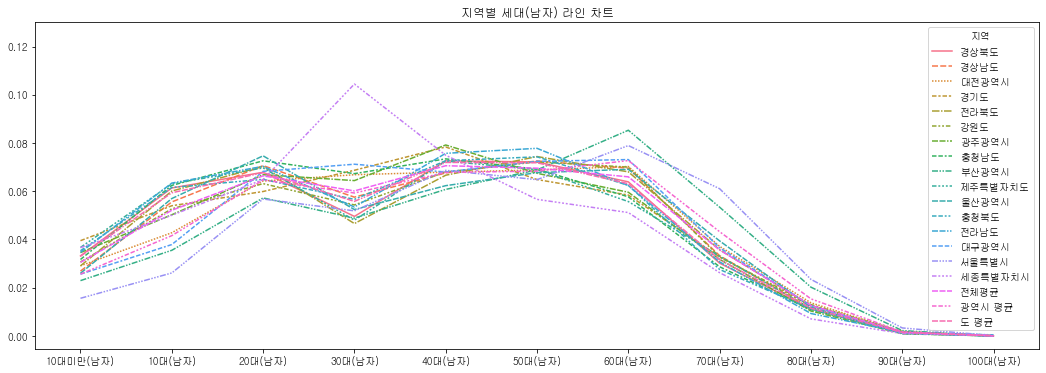

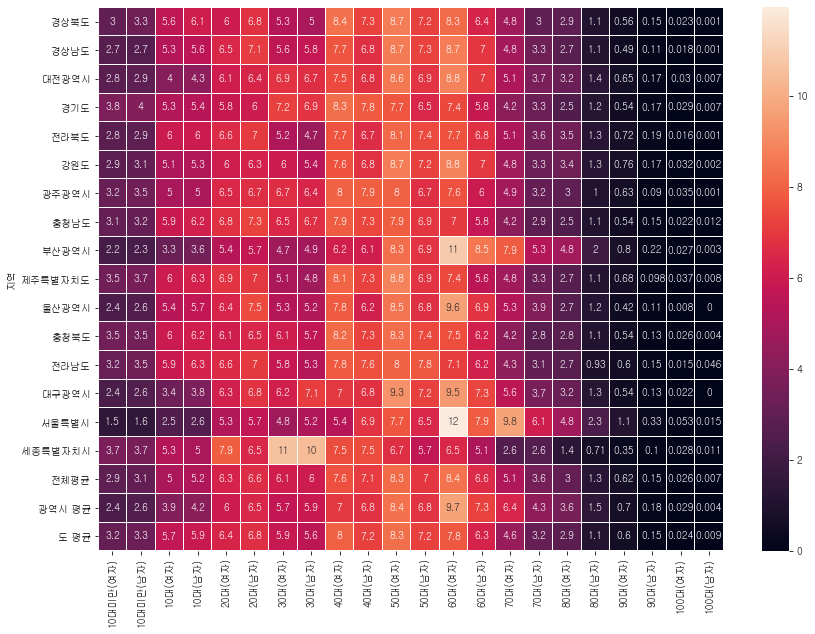

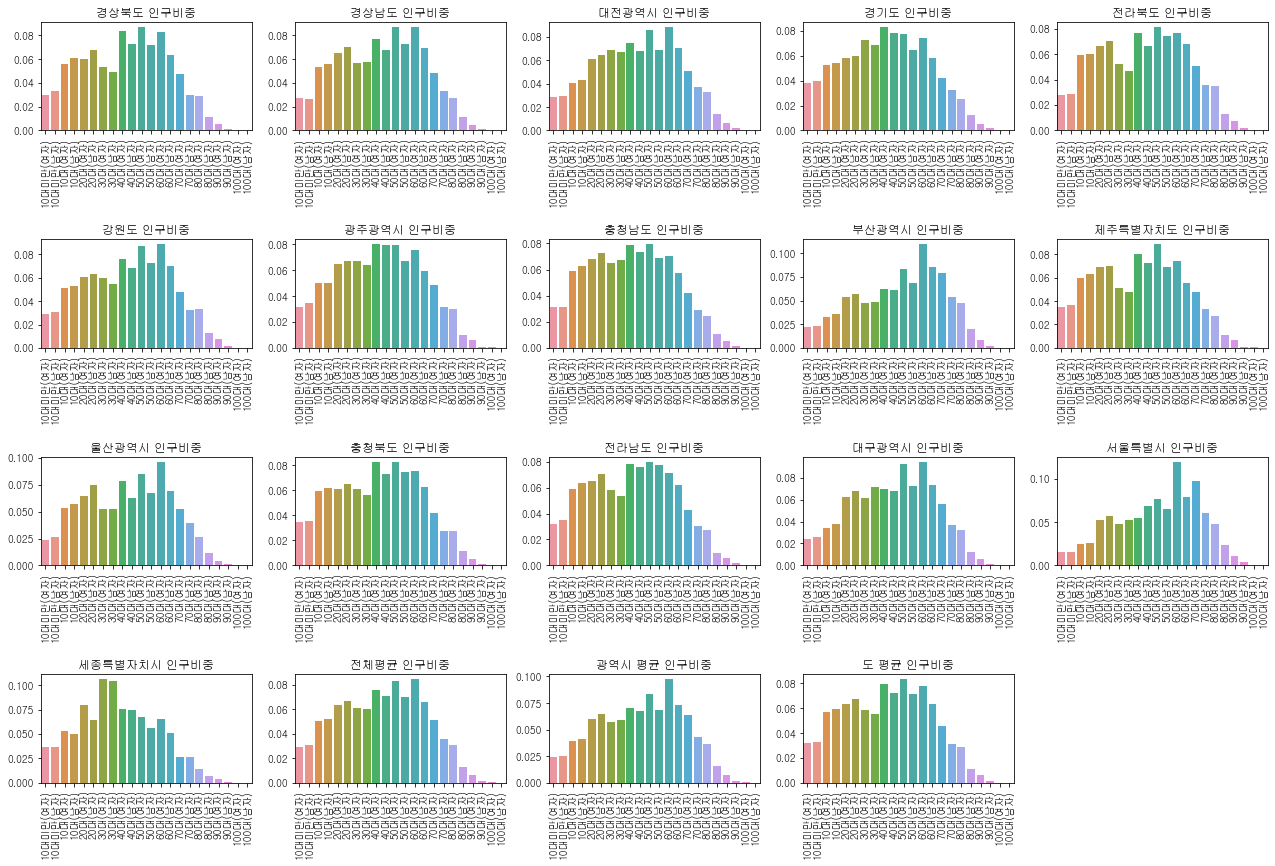

In [10]:
fig = plt.figure(figsize = (18, 6))
seaborn.lineplot(data=ag.loc[:, ag.columns.str.contains('여자')].T)
plt.title('지역별 세대(여자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

fig = plt.figure(figsize = (18, 6))
seaborn.lineplot(data=ag.loc[:, ag.columns.str.contains('남자')].T)
plt.title('지역별 세대(남자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

plt.figure(figsize=(14, 10))
seaborn.heatmap((ag*100).round(3),
           annot=True, linewidths=0.01,)

plt.show()

fig = plt.figure(figsize=(22, 18))
plt.xticks(rotation=90)
for i, n in enumerate(list(ag.index)):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=1.0)
    plt.title("{} 인구비중".format(n))
    seaborn.barplot(data=ag.loc[ag.index == n])
    plt.xticks(rotation=90)

## Train/Test 데이터셋 확인

In [11]:
def check_train_test_column_values(train, test, column):
    # 함수 정의: 두 데이터 테이블과 특정 컬럼을 집어 넣으면 value를 비교하여 출력하는 함수
    print("{} Column에 대한 train_test_values_check 입니다=======================".format(column))
    # Train/Test set의 입력 칼럼의 value를 set으로 받아줍니다.
    train_colset = set(train[column])
    test_colset  = set(test[column])

    # Train/Test-set 고유한 value의 개수를 구함.
    print(f"Train-set에 있는 고유한 value 개수 : {len(train_colset)}")
    print(f"Test-set에 있는 고유한 value 개수 : {len(test_colset)}")

    # Train/Test-set 모두에 포함되어있는 value를 구함.
    print('='* 80)
    common_colset = train_colset.intersection(test_colset)
    print(f"Train/Test-set에 공통으로 포함되어 있는 value 개수 : {len(common_colset)}")
    if len(common_colset) > 100: # value가 너무 많으면 어차피 보기 힘드므로 출력을 pass 합니다
        pass
    else:
        try: # int나 float은 sorted가 먹지 않기 때문에 try except로 넣어줍니다.
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {sorted(common_colset)}")
        except:
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {(common_colset)}")

    # Train-set에만 있는 value를 구함.
    print('='* 80)
    train_only_colset = train_colset.difference(test_colset)
    print(f"Train-set에만 있는 value는 총 {len(train_only_colset)} 개 입니다.")
    if len(train_only_colset) > 100:
        pass
    else:
        try:
            print(f"Train-set에만 있는 value는 : {sorted(train_only_colset)}")
        except:
            print(f"Train-set에만 있는 value는 : {(train_only_colset)}")

    # Test-set에만 있는 value를 구함.
    print('='* 80)
    test_only_colset = test_colset.difference(train_colset)
    print(f"Test-set에만 있는 value는 총 {len(test_only_colset)} 개 입니다.")
    if len(test_only_colset) > 100:
        pass
    else:
        try:
            print(f"Test-set에만 있는 value는 : {sorted(test_only_colset)}")
        except:
            print(f"Test-set에만 있는 value는 : {(test_only_colset)}")
    print(" ")

In [12]:
obj_cols = []
for col in train.columns:
    if train[col].dtypes == 'object':
        obj_cols.append(col)

for col in obj_cols:
    check_train_test_column_values(train, test, col)

단지코드 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 423
Test-set에 있는 고유한 value 개수 : 150
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 0
Train/Test-set에 공통으로 포함되어 있는 value : []
Train-set에만 있는 value는 총 423 개 입니다.
Test-set에만 있는 value는 총 150 개 입니다.
 
임대건물구분 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 2
Test-set에 있는 고유한 value 개수 : 2
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 2
Train/Test-set에 공통으로 포함되어 있는 value : ['상가', '아파트']
Train-set에만 있는 value는 총 0 개 입니다.
Train-set에만 있는 value는 : []
Test-set에만 있는 value는 총 0 개 입니다.
Test-set에만 있는 value는 : []
 
지역 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 16
Test-set에 있는 고유한 value 개수 : 15
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 15
Train/Test-set에 공통으로 포함되어 있는 value : ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
Train-set에만 있는 value는 총 1 개 입니다.
T

## 변수별 분포

In [13]:
train["임대보증금"] = pd.to_numeric(train["임대보증금"], errors='coerce')
train["임대료"] = pd.to_numeric(train["임대료"], errors='coerce')
train.dropna(subset=["임대보증금", "임대료"])

train["세대당주차면수"] = train["단지내주차면수"]/train["총세대수"]
train["세대당등록차량수"] = train["등록차량수"]/train["총세대수"]

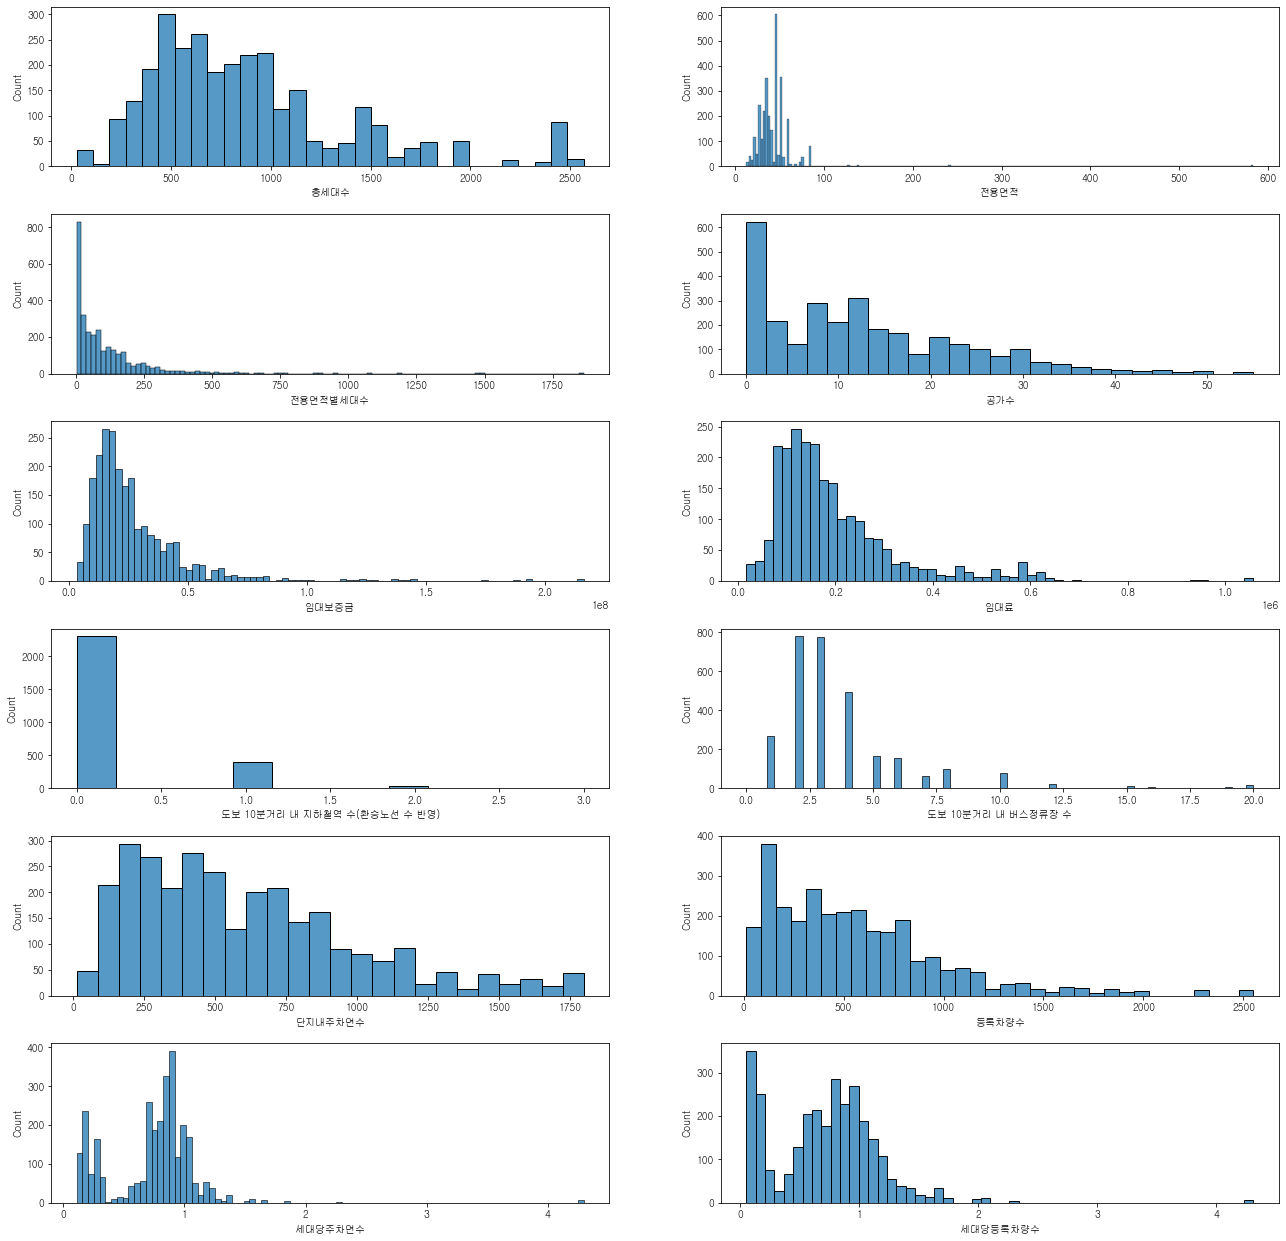

In [14]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)
        
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    seaborn.histplot(train[n])

C:\Users\jinho\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jinho\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jinho\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jinho\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jinho\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jinho\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

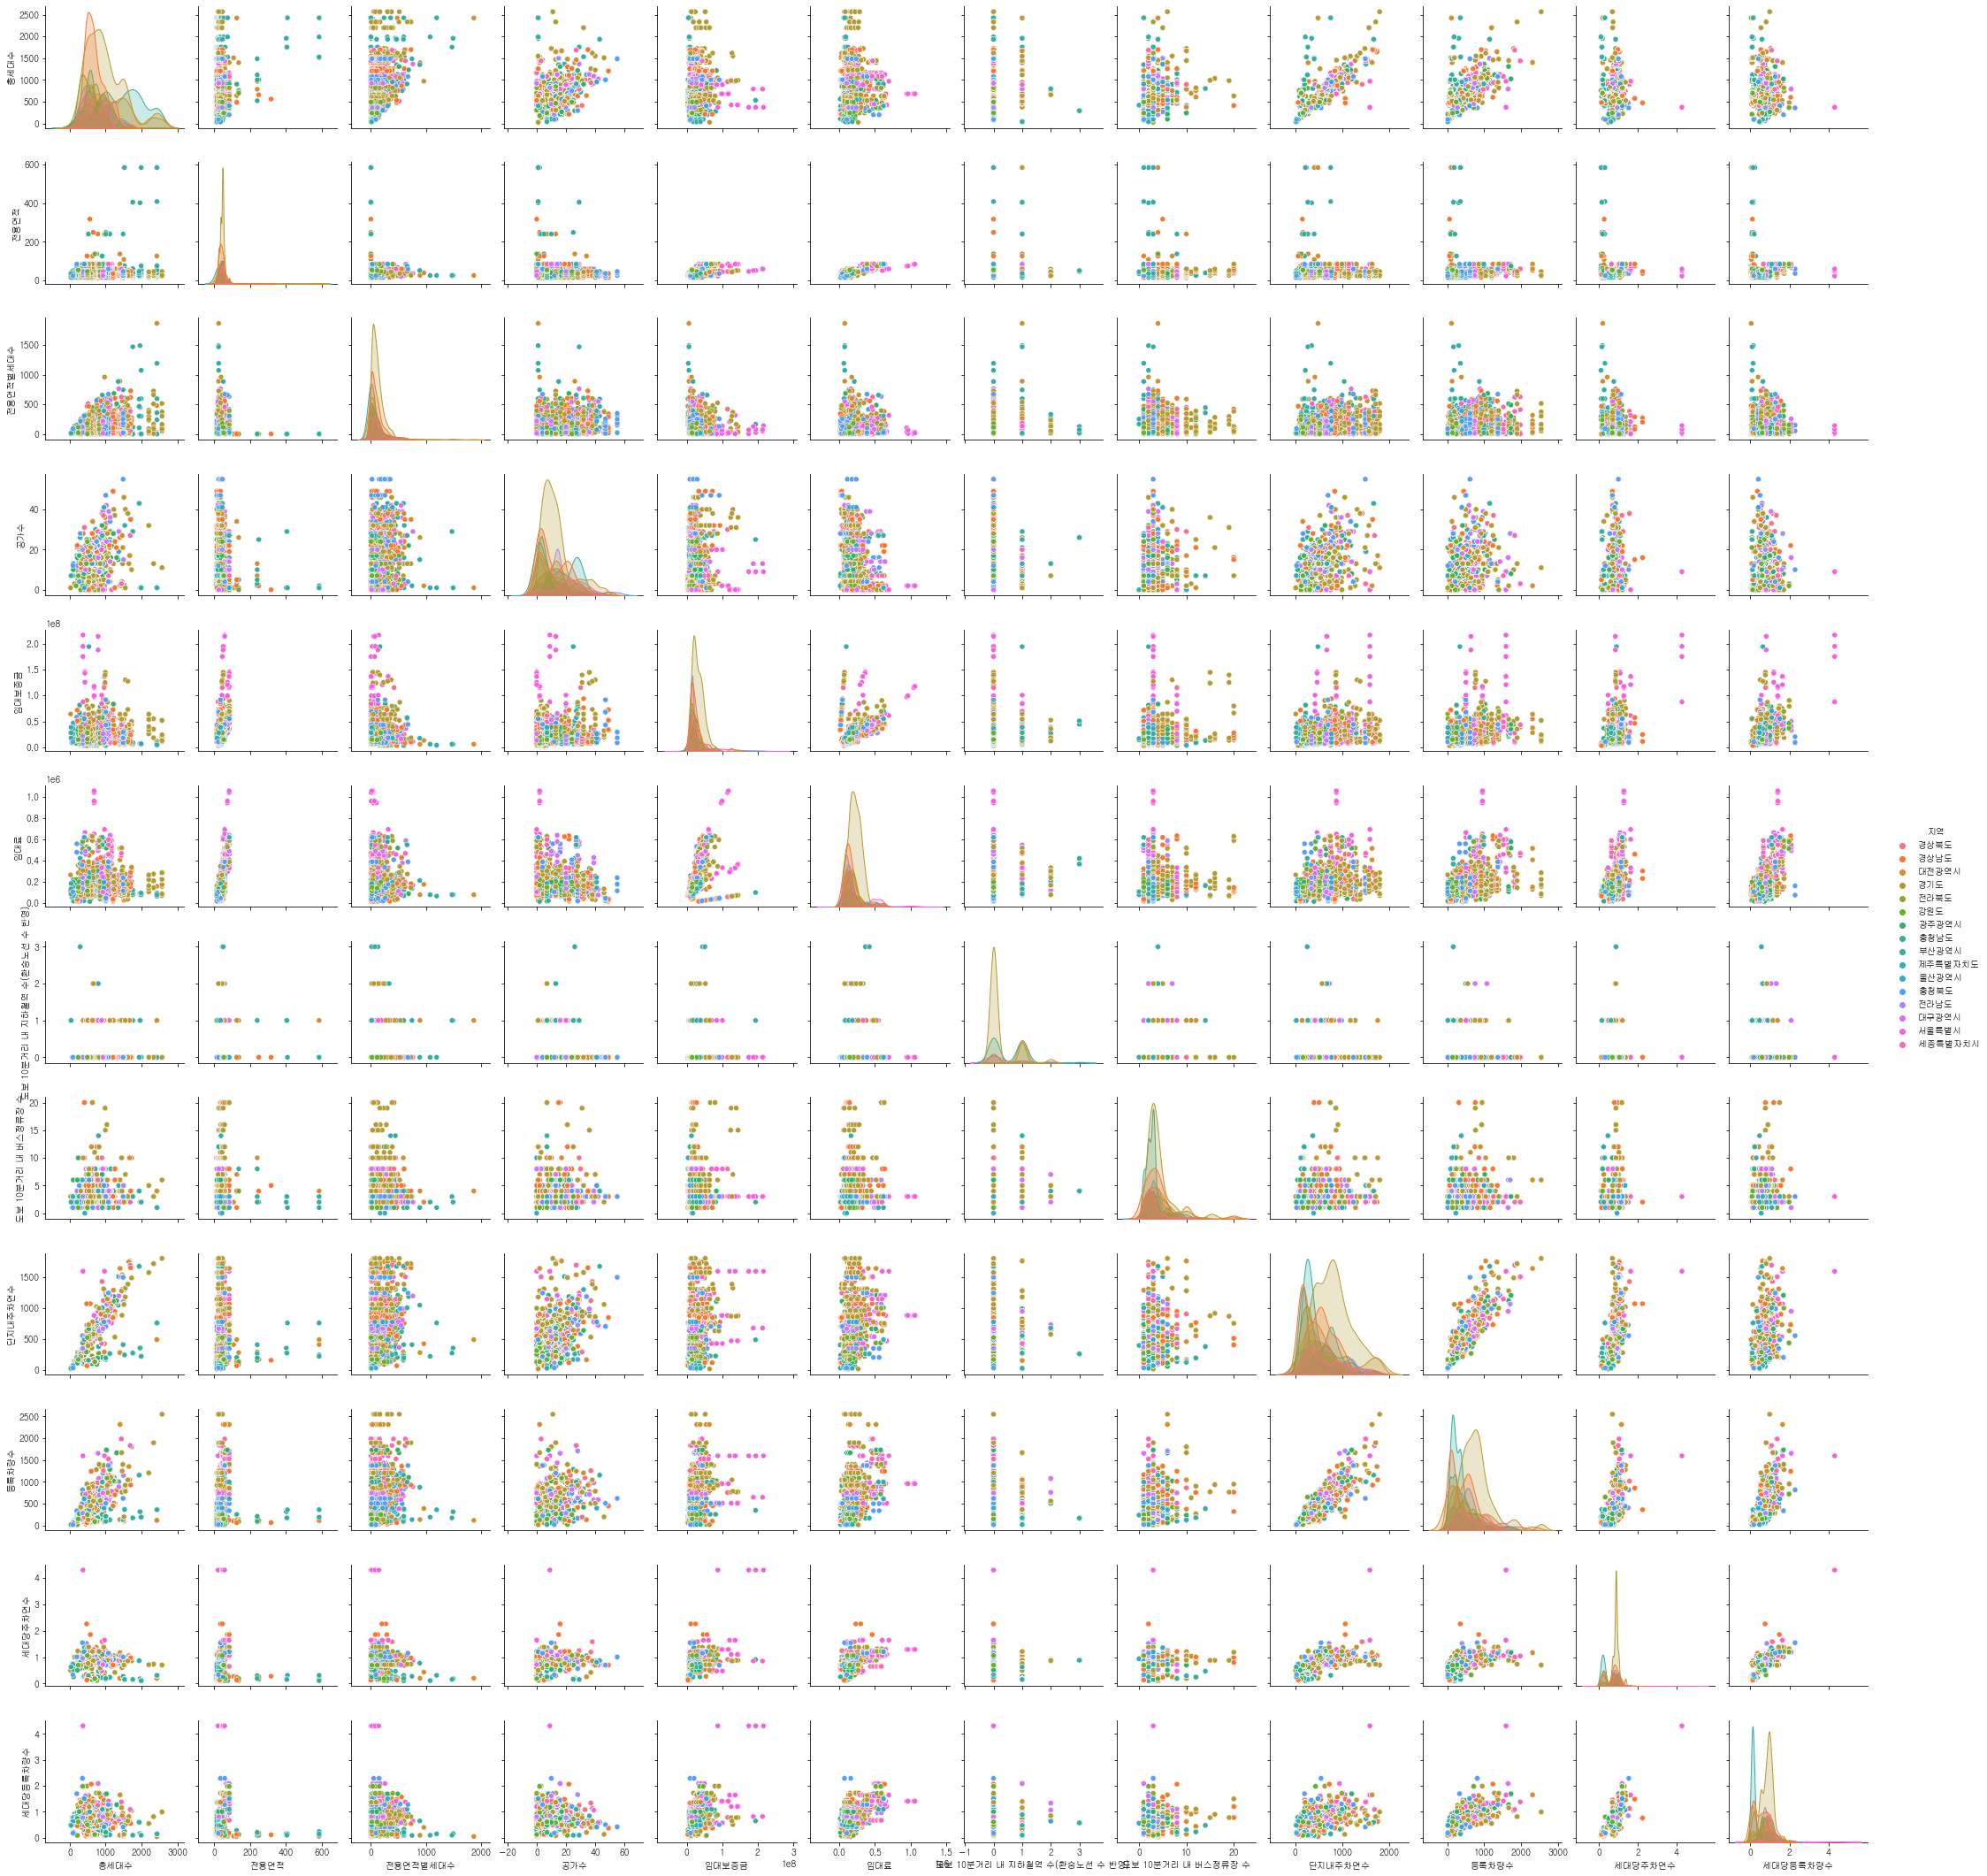

In [15]:

seaborn.pairplot(train, hue="지역")


이런식으로 코멘트를 달아본다. 
어떤 변화가 있는가?

In [17]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,세대당주차면수,세대당등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,1.583333,1.127778
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,1.583333,1.127778
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,1.583333,1.127778
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,1.583333,1.127778
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,1.583333,1.127778
